<a href="https://colab.research.google.com/github/silvaelaine/data-analysis-PRF-01/blob/main/Data_Analysis_PRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados da PRF - *Acidentes de trânsito*
*Elaine Silva* ([Github](https://github.com/silvaelaine), [Linkedin](https://www.linkedin.com/in/euelainesilva/))

---

O Brasil é o **terceiro país** com mais mortes no trânsito em todo o mundo, configurando como a oitava principal causa de mortes no país, segundo o Status Report on Road Safety, relatório da **Organização Mundial de Saúde (OMS)**. São aproximadamente 1,35 milhão de vítimas anualmente.

<center><img alt="Analisando acidentes" width="80%" src="https://images.unsplash.com/photo-1530685932526-48ec92998eaa?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1470&q=80"></center>

### **[Dados Abertos da PRF](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf)**
---
Dados Abertos são dados institucionais, disponibilizados em formato legível por máquina e sem restrição de licenças, patentes ou mecanismos de controle, que qualquer pessoa pode livremente usá-los, reutilizá-los e redistribuí-los.

Os dados classificados como abertos podem ser utilizados de várias formas, seja pelo próprio governo ou pela sociedade, como, por exemplo, no desenvolvimento de aplicativos, que exibem informações de forma gráfica e interativa.

A elaboração do Plano de Dados Abertos da PRF vem ao encontro do disposto na Lei de Acesso à Informação (LAI), na Instrução Normativa SLTI nº 4, de 13 de abril de 2012 (que institui a Infraestrutura Nacional de Dados Abertos), no Decreto nº 8.777, de 11 de maio de 2016 (que institui a Política de Dados Abertos no Executivo Federal), bem como dos compromissos assumidos pelo Brasil no âmbito do Plano de Ação Nacional de Governo Aberto.

Por meio desse site é possível baixar de 2007 até 2023 (presente). Os arquivos usados nessa análise estão estão compactados (zipados) [neste link](https://drive.google.com/file/d/1-Yk6TV00CH3PixTkKmkoUJQsNiUc5xLm/view).


# Objetivos e quais os problemas a serem resolvidos

O objetivo desse projeto é analisar os dados a fim de obter insights sobre os acidentes e responder perguntas. Para melhor nos guiar na análise, formulei o problema no seguinte conjunto de questões, para que possamos explorá-lo com maior profundidade:


*  Qual a maior causa de acidentes?
*  Qual dia da semana há mais acidentes Qual dia da semana há mais acidentes? E em qual fase do dia?
*  Qual tipo de acidente ocorre com mais frequência?
*  Qual o top 5 de municípios com mais ocorrência de acidentes? E os estados?
*  Em quais rodovias os acidentes são mais frequentes?
*  Mapa do local que aconteceu o acidente envolvendo mais vítimas

# Importação e Obtenção dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px

plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)

In [2]:
!pip install plotly==5.5.0

In [3]:
df = pd.read_csv('datatran2023.csv', delimiter=';',
                            encoding='ISO-8859-1')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [4]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 44035 linhas e 30 colunas.


# Integridade dos dados

In [5]:
# informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44035 entries, 0 to 44034
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      44035 non-null  int64  
 1   data_inversa            44035 non-null  object 
 2   dia_semana              44035 non-null  object 
 3   horario                 44035 non-null  object 
 4   uf                      44035 non-null  object 
 5   br                      43927 non-null  float64
 6   km                      43927 non-null  object 
 7   municipio               44035 non-null  object 
 8   causa_acidente          44035 non-null  object 
 9   tipo_acidente           44035 non-null  object 
 10  classificacao_acidente  44035 non-null  object 
 11  fase_dia                44035 non-null  object 
 12  sentido_via             44035 non-null  object 
 13  condicao_metereologica  44035 non-null  object 
 14  tipo_pista              44035 non-null

In [6]:
# Verificando dados faltantes
def tabela_dados_faltantes(df):
        # dados faltantes
        dados_faltantes = df.isnull().sum()

        # porcentagem de dados faltantes
        dados_faltantes_percent = 100 * df.isnull().sum() / len(df)

        # criando tabela com resultados
        tabela_valores = pd.concat([dados_faltantes, dados_faltantes_percent], axis=1)

        # renomeando as colunas
        tabela_valores_ren_columns = tabela_valores.rename(
        columns = {0 : 'Valores faltantes', 1 : '% de valor total'})

        # ordenando a ordem das colunas de maior para menor
        tabela_valores_ren_columns = tabela_valores_ren_columns[
           tabela_valores_ren_columns.iloc[:,1] != 0].sort_values(
        '% de valor total', ascending=False).round(1)

        # Print de informações resumidas
        print ("o dataframe selecionado tem " + str(df.shape[1]) + " colunas.\n"
            "Há " + str(tabela_valores_ren_columns.shape[0]) +
              " colunas com valores faltantes.")

        # retornando o dataframe com as informações
        return tabela_valores_ren_columns

data_missing = tabela_dados_faltantes(df)
data_missing

o dataframe selecionado tem 30 colunas.
Há 5 colunas com valores faltantes.


,Valores faltantes,% de valor total
delegacia,422,1.0
br,108,0.2
km,108,0.2
uop,23,0.1
regional,4,0.0


In [7]:
def gerar_metadados(dataframe):
    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'valores_faltantes': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata


metadados = gerar_metadados(df)
metadados

,nome_variavel,tipo,valores_faltantes,percent_nulos,cardinalidade
0,id,int64,0,0.00,44035
1,veiculos,int64,0,0.00,13
2,feridos,int64,0,0.00,32
3,ignorados,int64,0,0.00,11
4,ilesos,int64,0,0.00,50
...,...,...,...,...,...
25,horario,object,0,0.00,1350
26,dia_semana,object,0,0.00,7
27,data_inversa,object,0,0.00,243
28,delegacia,object,422,0.96,146


As colunas `delegacia`, `br`, `km`, `uop` e `regional` são as únicas a apresentam valores vazios.

In [8]:
# Colunas com dados categóricos
df.select_dtypes(include=['object']).columns

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [9]:
# Colunas com dados numéricos
df.select_dtypes(exclude=['object']).columns

Index(['id', 'br', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
       'ilesos', 'ignorados', 'feridos', 'veiculos'],
      dtype='object')

# Analisando os dados

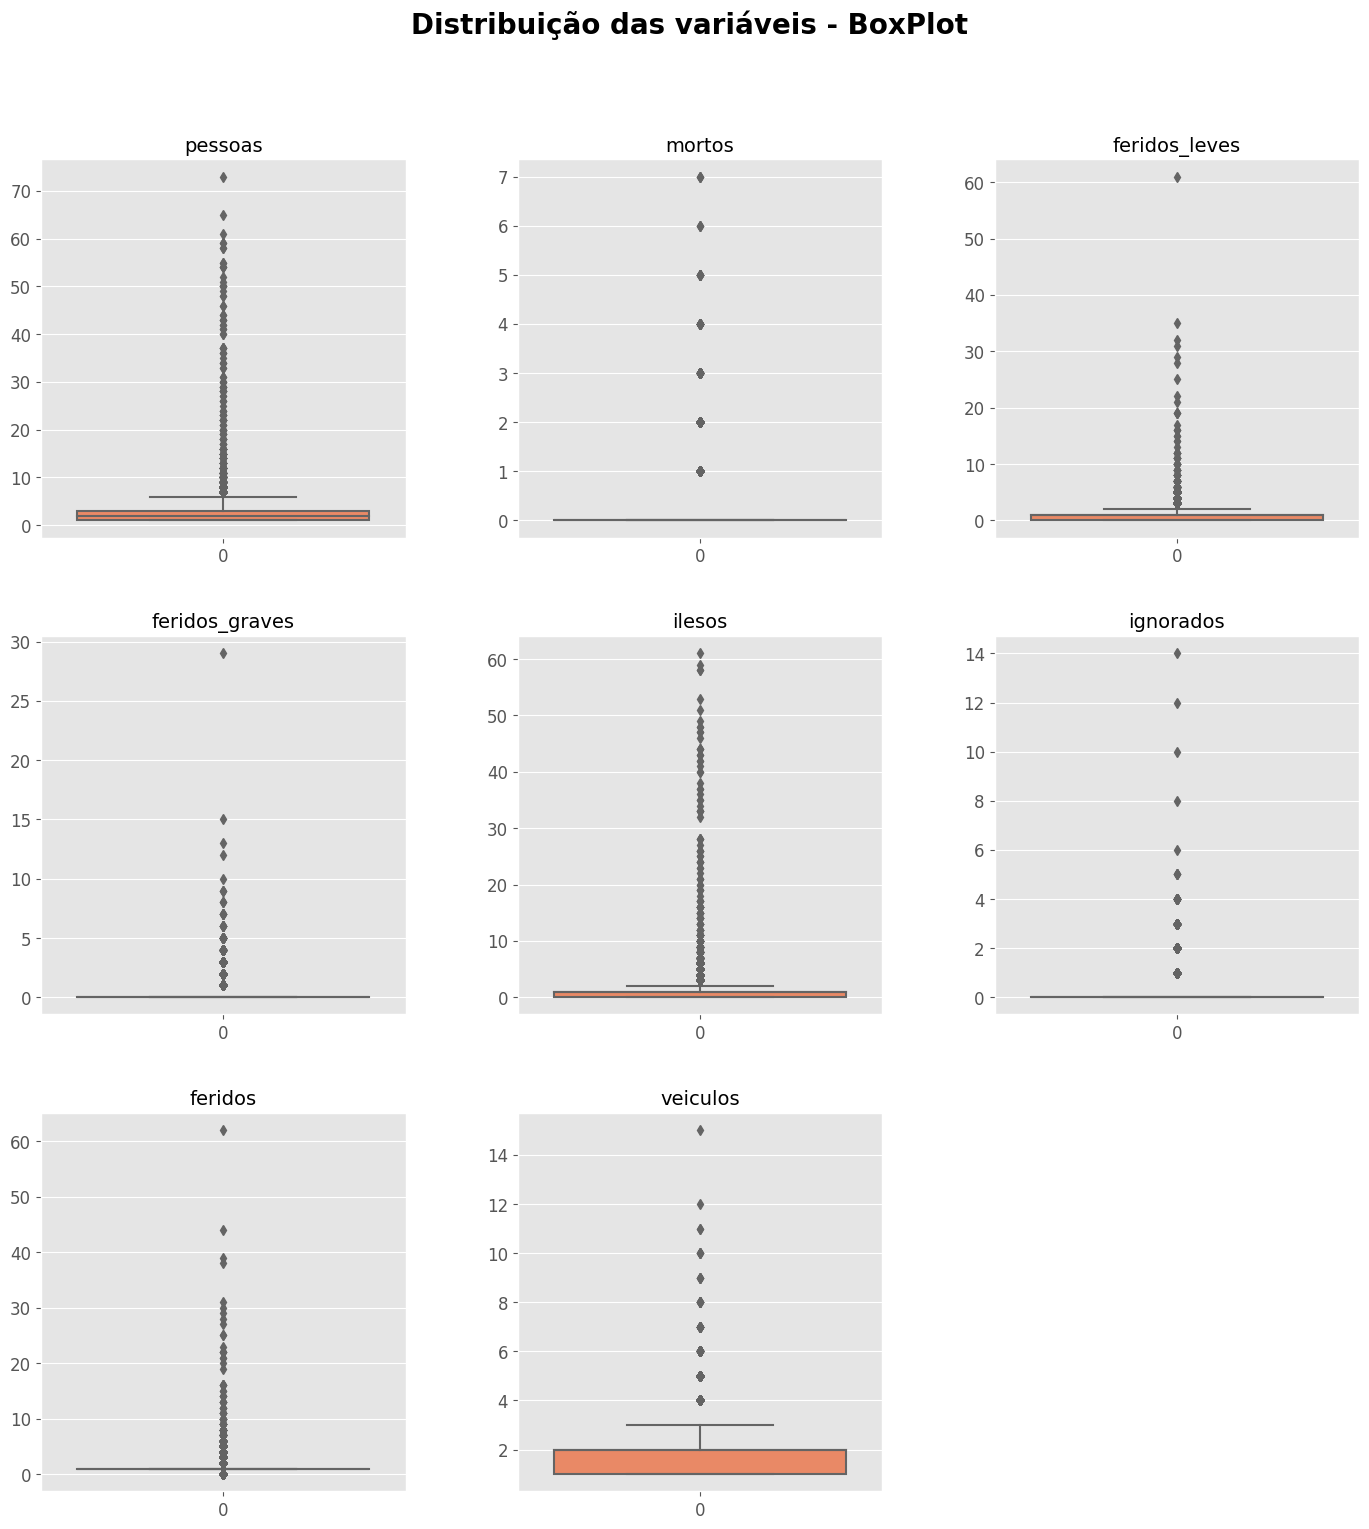

In [10]:
# Distribuição das variáveis numéricas
def variaveis_numericas_boxplot(data):

    # Selecionando apenas colunas numéricas
    numerical_cols = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
       'ilesos', 'ignorados', 'feridos', 'veiculos']

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numerical_cols) // 3 + (len(numerical_cols) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Plota boxplots para cada coluna
    for i, column in enumerate(numerical_cols):
        sns.boxplot(data=df[column], ax=axes[i//3, i%3], color="coral")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Removendo gráficos vazios
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Título principal
    fig.suptitle("Distribuição das variáveis - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots
variaveis_numericas_boxplot(df)

In [11]:
numerical_columns = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
       'ilesos', 'ignorados', 'feridos', 'veiculos']

df[numerical_columns].describe()

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000
mean,2.462019,0.084274,0.872352,0.277120,1.071693,0.156580,1.149472,1.670353
std,2.198093,0.334204,1.072279,0.612197,1.810821,0.440062,1.182761,0.723926
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,73.000000,7.000000,61.000000,29.000000,61.000000,14.000000,62.000000,15.000000


Verificando presença de outliers:
Começando pela coluna `pessoa`:
*   A quantidade mínima de pessoas em um acidente é 1 e a máxima é 73, o que pode ser visto como um outlier (valor discrepante).
*   A quantidade mínima de `feridos leves` em um acidente é 0 e a máxima é 61, situação parecida com a da coluna pessoas que vai se repetir nas colunas `ilesos` e `feridos`.

Vamos verificar em qual linha do dataset se encontra esse acidente com 73 feridos:


In [12]:
df.query(f"pessoas == {df['pessoas'].max()}")

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
9021,536685,2023-07-18,terça-feira,16:40:00,GO,60.0,"81,5",ANAPOLIS,Frear bruscamente,Colisão traseira,Com Vítimas Fatais,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,73,1,25,2,43,2,27,3,"-16,313039","-48,832281",SPRF-GO,DEL02-GO,UOP01-DEL02-GO


<Axes: >

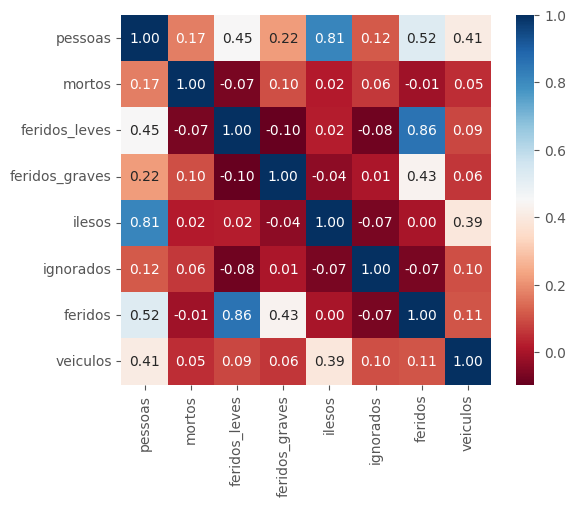

In [13]:
# Mapa de calor para correlações
sns.heatmap(df[numerical_columns].corr(), square = True, annot=True, fmt=".2f", linecolor='white', cmap='RdBu')

# Análise Exploratória (EDA)

##q1 - Qual a maior causa de acidentes?##

In [14]:
#Criando uma contagem - TOP 5 maiores causas de acidentes
top_causas_acidentes = df['causa_acidente'].value_counts().head()

In [15]:
# Definir cores do gráfico
cinza, cinza2 = "#AAAAAA", "#515151"
azul = "#253760"

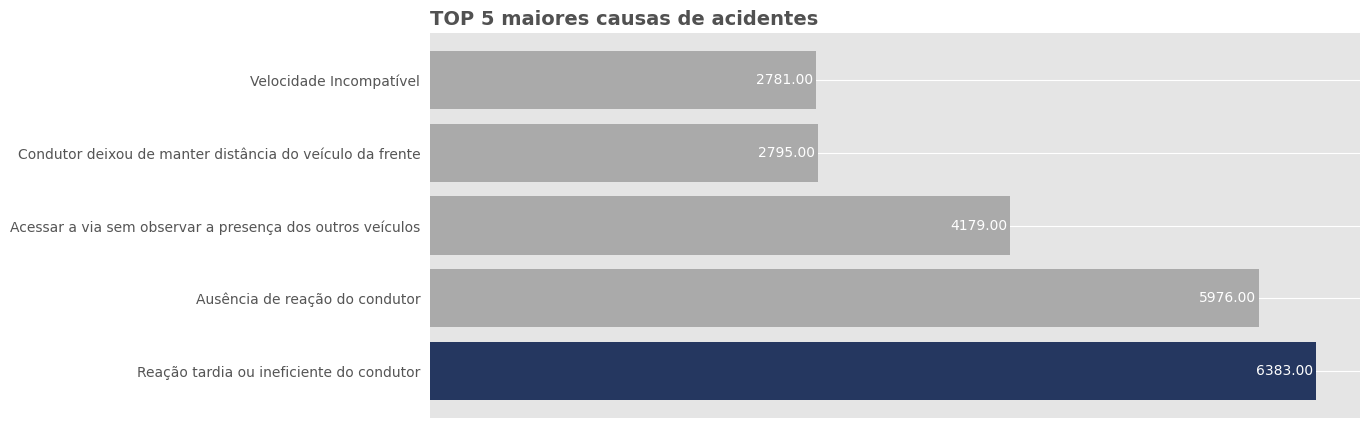

In [16]:
# Formação do gráfico
fig, ax = plt.subplots(figsize=(12, 5))

# Gráfico de barras para maiores causas de acidentes
top_causas_acidentes.plot.barh(color=cinza, width=0.8, ax=ax)
ax.set_title('TOP 5 maiores causas de acidentes', loc='left', fontsize=14, color=cinza2, fontweight='bold')
ax.set_ylabel('')

# Destacar barra da maior causa de acidente
causa_index = top_causas_acidentes.index.tolist().index("Reação tardia ou ineficiente do condutor")
ax.patches[causa_index].set_facecolor(azul)

# Adicionar rótulos de dados
for rect in ax.patches:
    width = rect.get_width()
    ax.annotate(f'{width:.2f}', xy=(rect.get_x() + rect.get_width(),
                                      rect.get_y() + rect.get_height() / 2),
                 xytext=(-2, -5),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color='white')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Remover eixo x
ax.get_xaxis().set_visible(False)

# Exibir o gráfico
plt.show()

##q2 - Qual dia da semana há mais acidentes? E em qual fase do dia?##

In [17]:
df['dia_semana'].value_counts()

domingo          7363
sábado           7123
sexta-feira      6663
segunda-feira    6086
quinta-feira     5865
quarta-feira     5531
terça-feira      5404
Name: dia_semana, dtype: int64

In [18]:
df['fase_dia'].value_counts()

Pleno dia      23960
Plena Noite    15332
Anoitecer       2507
Amanhecer       2236
Name: fase_dia, dtype: int64

In [19]:
# Qual dia da semana há mais acidentes?
dia_semana = df['dia_semana'].value_counts().head()
# E em qual fase do dia?
fase_dia = df['fase_dia'].value_counts().head()

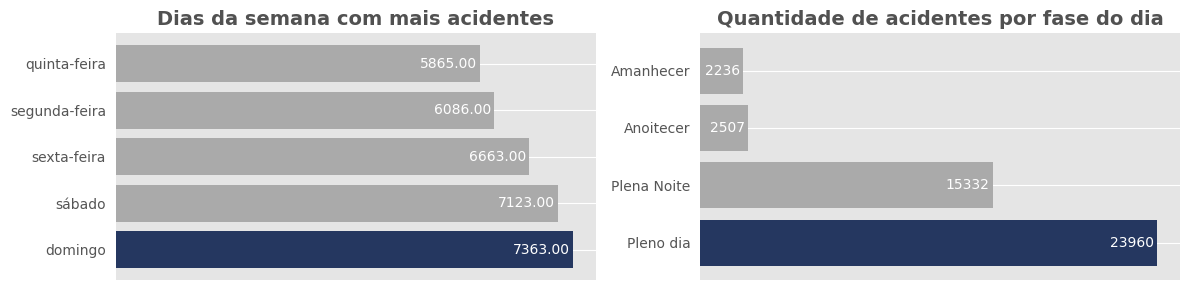

In [20]:
# Formação do gráfico
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# -------------------------------------------------------

# Gráfico de barras para dias da semana com mais acidente
dia_semana.plot.barh(color=cinza, width=0.8, ax=ax1)
ax1.set_title('Dias da semana com mais acidentes', loc='center', fontsize=14, color=cinza2, fontweight='bold')
ax1.set_ylabel('')

# Destacar barra de 'domingo'
dia_index = dia_semana.index.tolist().index("domingo")
ax1.patches[dia_index].set_facecolor(azul)

# Adicionar rótulos de dados
for rect in ax1.patches:
    width = rect.get_width()
    ax1.annotate(f'{width:.2f}', xy=(rect.get_x() + rect.get_width(),
                                      rect.get_y() + rect.get_height() / 2),
                 xytext=(-2, -5),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color='white')

# Remover grids e eixos
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Remover yticks do eixo y
ax1.tick_params(left=False)

# Remover eixo x
ax1.get_xaxis().set_visible(False)

# -------------------------------------------------------

# Gráfico de barras para fases do dia com mais acidentes
fase_dia.plot.barh(color=cinza, width=0.8, ax=ax2)
ax2.set_title('Quantidade de acidentes por fase do dia', loc='center', fontsize=14, color=cinza2, fontweight='bold')

# Destacar barra de 'Pleno dia'
fase_index = fase_dia.index.tolist().index("Pleno dia")
ax2.patches[fase_index].set_facecolor(azul)

# Adicionar rótulos de dados
for rect in ax2.patches:
    width = rect.get_width()
    ax2.annotate(f'{width}', xy=(rect.get_x() + rect.get_width(),
                                 rect.get_y() + rect.get_height() / 2),
                 xytext=(-2, 0),
                 textcoords='offset points',
                 ha='right',
                 va='center',
                 color='white')

# Remover grids e eixos
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Remover yticks do eixo y
ax2.tick_params(left=False)

# Remover eixo x
ax2.get_xaxis().set_visible(False)

# -------------------------------------------------------

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

##q3 - Qual tipo de acidente ocorre com mais frequência? ##

In [21]:
tipo_acidente = df['tipo_acidente'].value_counts().head()

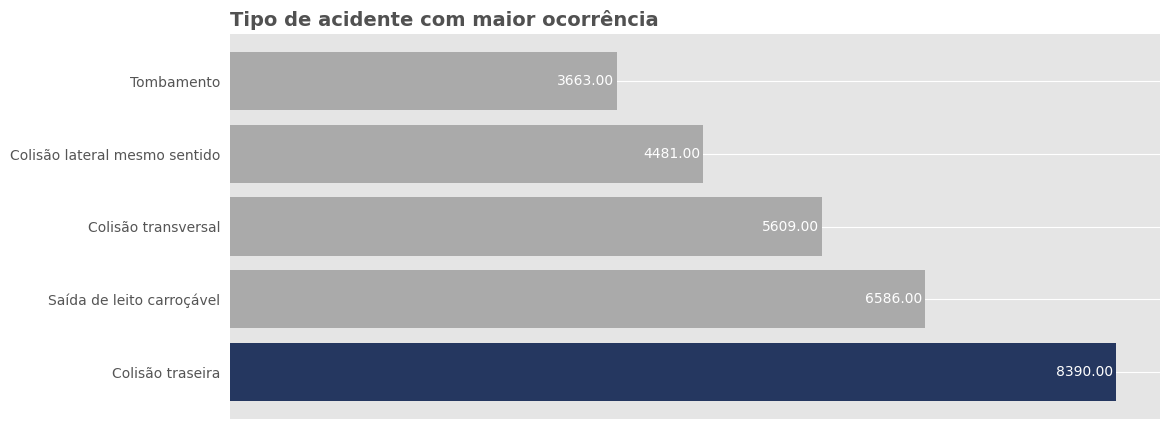

In [22]:
# Formação do gráfico
fig, ax = plt.subplots(figsize=(12, 5))

# Gráfico de barras para tipos de acidentes
tipo_acidente.plot.barh(color=cinza, width=0.8, ax=ax)
ax.set_title('Tipo de acidente com maior ocorrência', loc='left', fontsize=14, color=cinza2, fontweight='bold')
ax.set_ylabel('')

# Destacar barra 'Colisão traseira'
tipos_index = tipo_acidente.index.tolist().index("Colisão traseira")
ax.patches[tipos_index].set_facecolor(azul)

# Adicionar rótulos de dados
for rect in ax.patches:
    width = rect.get_width()
    ax.annotate(f'{width:.2f}', xy=(rect.get_x() + rect.get_width(),
                                      rect.get_y() + rect.get_height() / 2),
                 xytext=(-2, -5),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color='white')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Remover eixo x
ax.get_xaxis().set_visible(False)

# Exibir o gráfico
plt.show()

## q4 - Qual o top 5 de municípios com mais ocorrência de acidentes? E os estados? ##

In [31]:
top_municipios = df['municipio'].value_counts().head()
top_estados = df['uf'].value_counts().head()

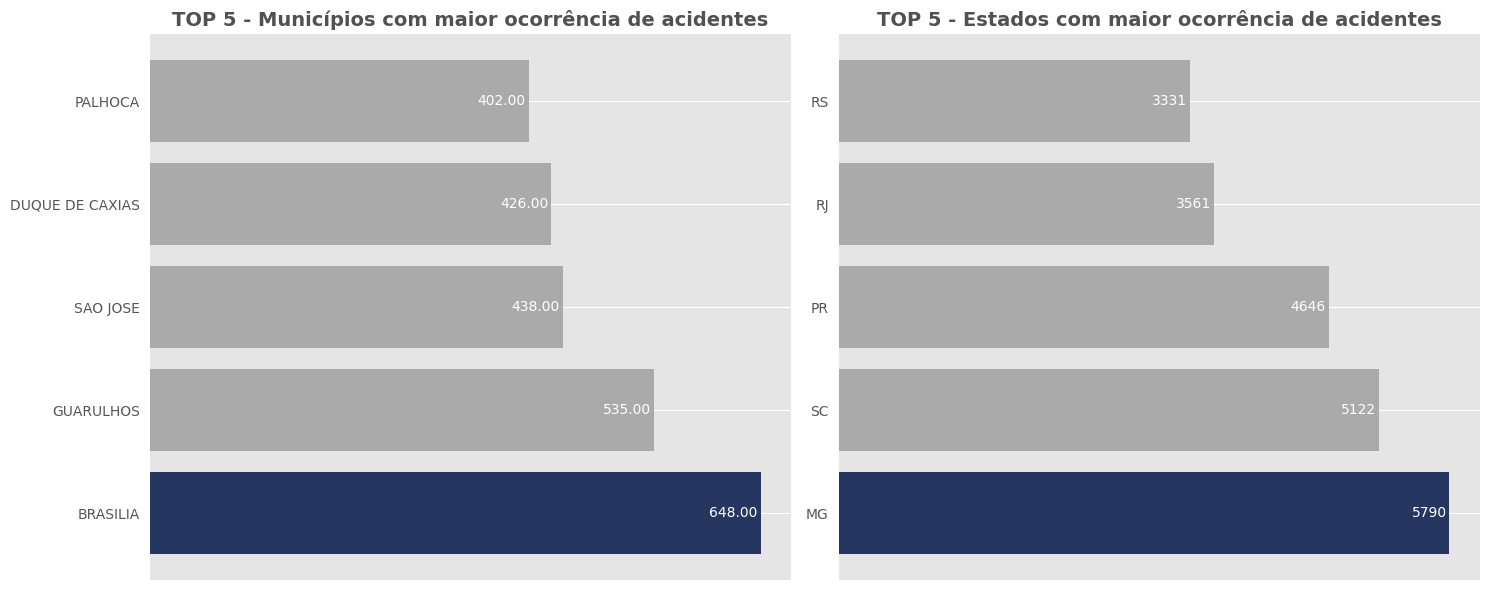

In [32]:
# Formação do gráfico
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# -------------------------------------------------------

# Gráfico de barras para municípios com maior occorência de acidentes
top_municipios.plot.barh(color=cinza, width=0.8, ax=ax1)
ax1.set_title('TOP 5 - Municípios com maior ocorrência de acidentes', loc='center', fontsize=14, color=cinza2, fontweight='bold')
ax1.set_ylabel('')

# Destacar barra para 'BRASILIA'
municipio_index = top_municipios.index.tolist().index("BRASILIA")
ax1.patches[municipio_index].set_facecolor(azul)

# Adicionar rótulos de dados
for rect in ax1.patches:
    width = rect.get_width()
    ax1.annotate(f'{width:.2f}', xy=(rect.get_x() + rect.get_width(),
                                      rect.get_y() + rect.get_height() / 2),
                 xytext=(-2, -5),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color='white')

# Remover grids e eixos
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Remover yticks do eixo y
ax1.tick_params(left=False)

# Remover eixo x
ax1.get_xaxis().set_visible(False)

# -------------------------------------------------------

# Gráfico de barras para estados com maior ocorrência de acidentes
top_estados.plot.barh(color=cinza, width=0.8, ax=ax2)
ax2.set_title('TOP 5 - Estados com maior ocorrência de acidentes', loc='center', fontsize=14, color=cinza2, fontweight='bold')

# Destacar barra 'MG'
estados_index = top_estados.index.tolist().index("MG")
ax2.patches[estados_index].set_facecolor(azul)

# Adicionar rótulos de dados
for rect in ax2.patches:
    width = rect.get_width()
    ax2.annotate(f'{width}', xy=(rect.get_x() + rect.get_width(),
                                 rect.get_y() + rect.get_height() / 2),
                 xytext=(-2, 0),
                 textcoords='offset points',
                 ha='right',
                 va='center',
                 color='white')

# Remover grids e eixos
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Remover yticks do eixo y
ax2.tick_params(left=False)

# Remover eixo x
ax2.get_xaxis().set_visible(False)

# -------------------------------------------------------

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

## q5 - Em quais rodovias os acidentes são mais frequentes? ##

In [39]:
rodovias = df['br'].value_counts().head()
rodovias

101.0    7513
116.0    7076
381.0    2147
40.0     2075
153.0    1668
Name: br, dtype: int64

In [41]:
df['br']

0        101.0
1        116.0
2        163.0
3        376.0
4        116.0
         ...  
44030    116.0
44031    101.0
44032    343.0
44033    116.0
44034    392.0
Name: br, Length: 44035, dtype: float64

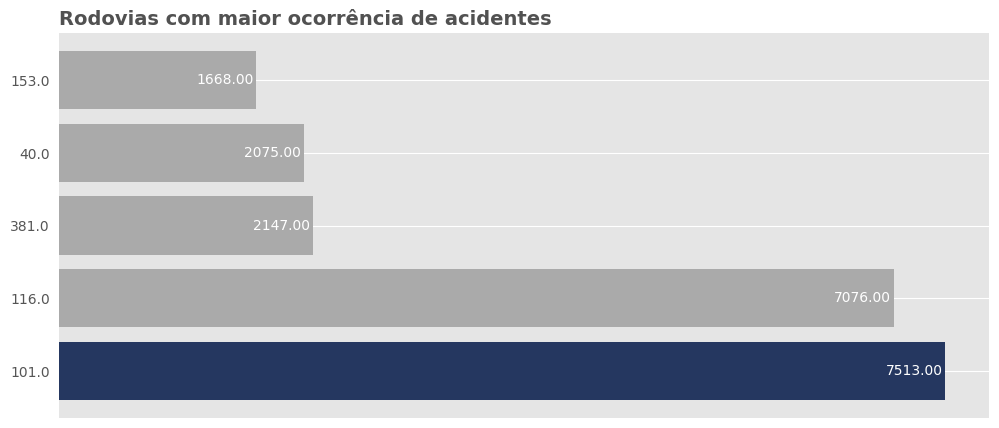

In [43]:
# Formação do gráfico
fig, ax = plt.subplots(figsize=(12, 5))

# Gráfico de barras para rodovias
rodovias.plot.barh(color=cinza, width=0.8, ax=ax)
ax.set_title('Rodovias com maior ocorrência de acidentes', loc='left', fontsize=14, color=cinza2, fontweight='bold')
ax.set_ylabel('')

# Destacar barra BR '101'
rodovias_index = rodovias.index.tolist().index(101.0)
ax.patches[rodovias_index].set_facecolor(azul)

# Adicionar rótulos de dados
for rect in ax.patches:
    width = rect.get_width()
    ax.annotate(f'{width:.2f}', xy=(rect.get_x() + rect.get_width(),
                                      rect.get_y() + rect.get_height() / 2),
                 xytext=(-2, -5),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color='white')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Remover eixo x
ax.get_xaxis().set_visible(False)

# Exibir o gráfico
plt.show()

A `BR-101` tem início no município de Touros, no estado do Rio Grande do Norte, e termina em São José do Norte, no Rio Grande do Sul. Também é localizada ao lado da `BR-116`, que encontra-se em segundo lugar no ranking das que ocorrem acidentes como mostra o gráfico acima.

## q6 - Mapa do local que aconteceu o acidente envolvendo mais vítimas

In [44]:
!pip install pydeck -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.4 MB/s eta 0:00:00


In [45]:
import pydeck as pdk

In [47]:
df.query(f"pessoas == {df['pessoas'].max()}")

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
9021,536685,2023-07-18,terça-feira,16:40:00,GO,60.0,"81,5",ANAPOLIS,Frear bruscamente,Colisão traseira,Com Vítimas Fatais,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,73,1,25,2,43,2,27,3,"-16,313039","-48,832281",SPRF-GO,DEL02-GO,UOP01-DEL02-GO


In [51]:
# Criação da camada
layer = pdk.Layer(
    'HexagonLayer',  # Definir camada com o mapa HexagonLayer
    df, # DataFrame que contém seus dados
    get_position=['longitude', 'latitude'], # Colunas que possuem long. e lat.
    auto_highlight=True, # Realçar hexágonos quando cursor passar por cima
    elevation_scale=50, # Altura dos hexágonos
    pickable=True, # Permitir que os hexágonos sejam selecionáveis
    elevation_range=[0, 3000], # Definir a faixa de altura dos hexágonos
    extruded=True, # Dimensão da altura dos hexágonos
    coverage=1) # Cobertura da camada

# Definição da visão
view_state = pdk.ViewState(
    longitude= -48.832281, # Verificar longitude no Google Maps
    latitude= -16.313039, # Verificar latitude no Google Maps
    zoom=6, # Definir zoom inicial do mapa
    min_zoom=5, # Especificar o nível de zoom mínimo permitido
    max_zoom=15, # Especificar o nível de zoom máximo permitido
    pitch=40.5, # Controlar inclinação do mapa
    bearing=-27.36) # Definir rotação do mapa

# Combinação em um objeto 'Deck'
r = pdk.Deck(layers=[layer], initial_view_state=view_state)

# Salvando como html
r.to_html('hexagon-example.html')

<IPython.core.display.Javascript object>